<a href="https://colab.research.google.com/github/Prashil-14-Stack/ML/blob/main/NewAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import files
uploaded=files.upload()

Saving supermarket_sales - Sheet1.csv to supermarket_sales - Sheet1.csv


In [3]:
df=pd.read_csv("supermarket_sales - Sheet1.csv")

In [4]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [6]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


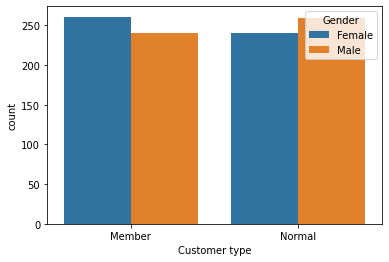

In [7]:
sns.countplot(x = 'Customer type', data = df, hue = 'Gender')

In [8]:
df.corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000


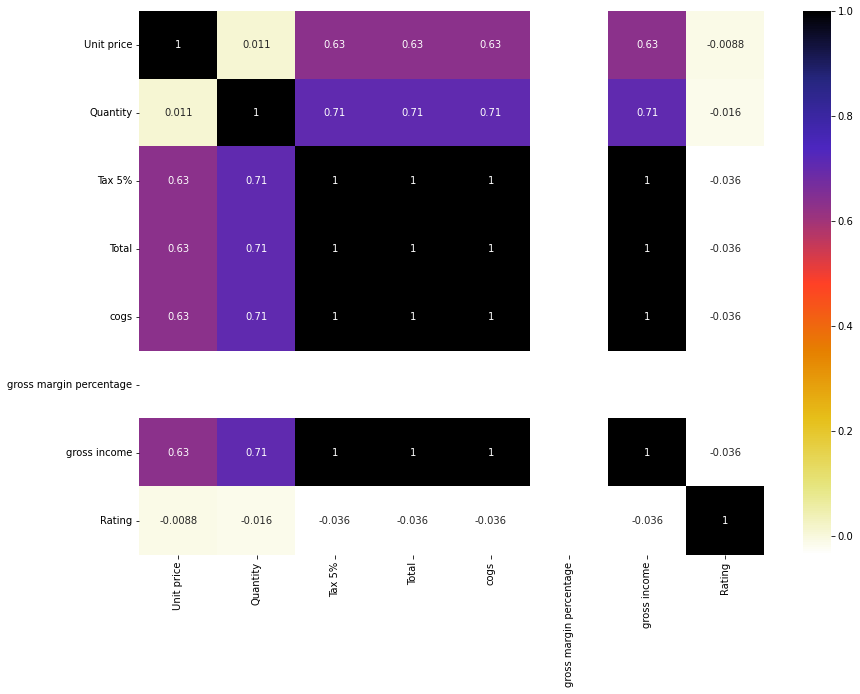

In [9]:
import seaborn as sns
plt.figure(figsize=(14,10))
cor=df.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

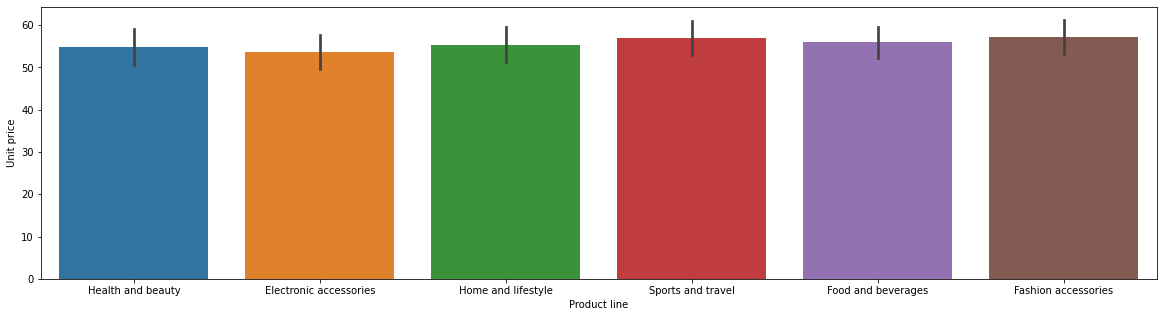

In [10]:
plt.figure(figsize = (20,5))
sns.barplot(x = 'Product line',y = 'Unit price', data = df)

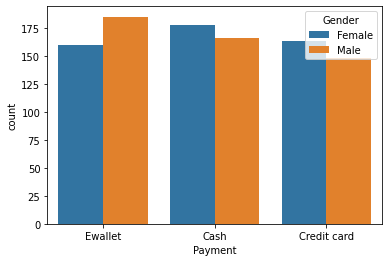

In [11]:
sns.countplot(x = 'Payment', data = df, hue = 'Gender')

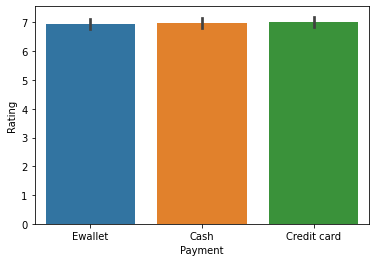

In [12]:
sns.barplot(x = 'Payment', y = 'Rating', data = df)

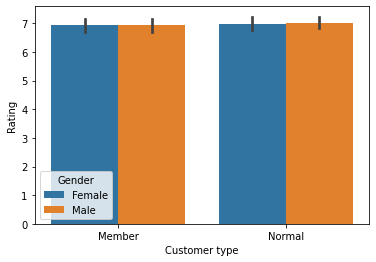

In [13]:
sns.barplot(x = 'Customer type', y = 'Rating', data = df, hue = 'Gender')


In [14]:
def correlation(dataset,threshold):
  col_corr=set()
  corr_matrix=dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if (corr_matrix.iloc[i,j])>threshold:
         colname=corr_matrix.columns[i]
         col_corr.add(colname)
  return col_corr

In [15]:
corr_features=correlation(df,0.7)
len(set(corr_features))

4

In [16]:
corr_features

{'Tax 5%', 'Total', 'cogs', 'gross income'}

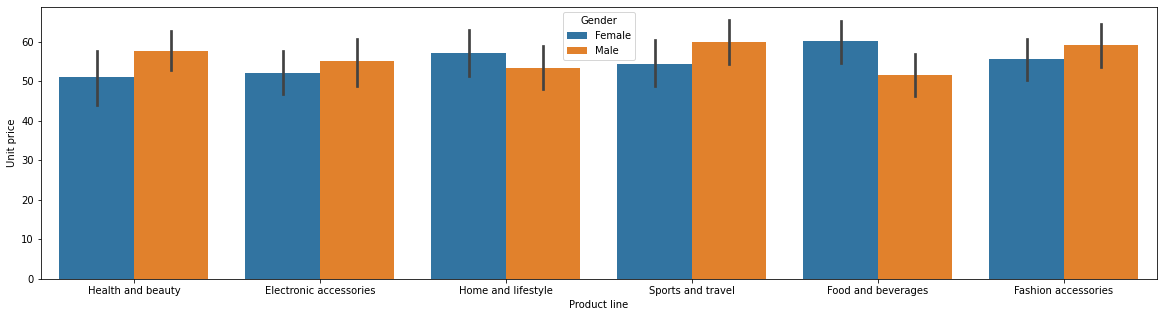

In [17]:
plt.figure(figsize = (20,5))
sns.barplot(x = 'Product line',y = 'Unit price', data = df,hue ='Gender')

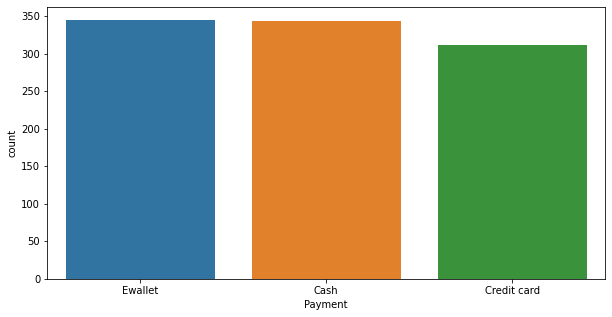

In [18]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'Payment', data =df)

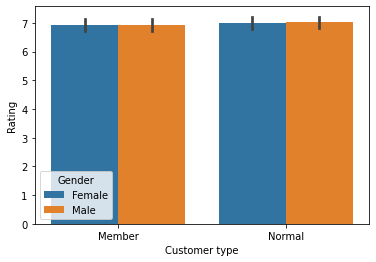

In [19]:
sns.barplot(x = 'Customer type', y = 'Rating', data = df, hue = 'Gender')

In [20]:
df.drop(['Tax 5%', 'Total', 'cogs', 'gross income'], axis = 1, inplace = True)

In [21]:
df_dummy = pd.get_dummies(df)

In [22]:
df_dummy

,Unit price,Quantity,gross margin percentage,Rating,Invoice ID_101-17-6199,Invoice ID_101-81-4070,Invoice ID_102-06-2002,Invoice ID_102-77-2261,Invoice ID_105-10-6182,Invoice ID_105-31-1824,...,Time_20:50,Time_20:51,Time_20:52,Time_20:54,Time_20:55,Time_20:57,Time_20:59,Payment_Cash,Payment_Credit card,Payment_Ewallet
0,74.69,7,4.761905,9.1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,15.28,5,4.761905,9.6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,46.33,7,4.761905,7.4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,58.22,8,4.761905,8.4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,86.31,7,4.761905,5.3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,40.35,1,4.761905,6.2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
996,97.38,10,4.761905,4.4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
997,31.84,1,4.761905,7.7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
998,65.82,1,4.761905,4.1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [23]:
df_dummy = df_dummy.round(0)


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = df_dummy .drop('Rating', axis = 1)
y = df_dummy ['Rating']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
dtree = DecisionTreeClassifier()

In [29]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [30]:
predict = dtree.predict(X_test)

In [31]:
from sklearn import metrics

In [32]:
print('MAE:', metrics.mean_absolute_error(y_test, predict))
print('MSE:', metrics.mean_squared_error(y_test, predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict)))

MAE: 2.12
MSE: 6.846666666666667
RMSE: 2.6166135875720484


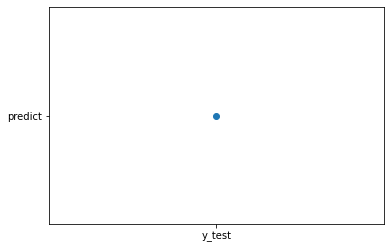

In [33]:
plt.scatter(x = 'y_test', y = 'predict')

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [36]:
y_pre=model.predict(X_test)

In [37]:
from sklearn.metrics import r2_score

In [38]:
r2_score(y_test,y_pre)*100

-23.991198916176828

In [39]:
from sklearn.svm import SVR

In [40]:
model=SVR()
model.fit(X,y)

SVR()

In [41]:
y_pred=model.predict(X_test)

In [42]:
from sklearn.metrics import r2_score

In [43]:
rsqre=r2_score(y_test,y_pred)

In [44]:
print("R-Square :", rsqre*100)

R-Square : -0.36895323073249386


In [45]:
from sklearn.metrics import accuracy_score

In [46]:
accuracy=accuracy_score(y_test,predict)
accuracy

0.14